
# Trabajo Práctico Nº 1: Algoritmos Genéticos para la Minimización de \( y = x^2 \)

En este notebook se desarrollan tres algoritmos genéticos en Python para minimizar la función \( y = x^2 \) utilizando selección por **Ranking**, **Ruleta** y **Torneo**.

## Configuración del Problema
- Intervalo de la variable de decisión: [-31, 31]
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.85
- Probabilidad de mutación: 0.09
- Tamaño de la población: 4
- Generaciones: 10

El objetivo es evaluar el desempeño de cada método en encontrar el valor mínimo de \( y = x^2 \) mediante 30 lanzamientos para cada uno.


In [1]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros generales
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.85
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # Valor pequeño para evitar división por cero en la función de aptitud

# Función para convertir binario a decimal
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

# Función objetivo y = x^2
def funcion_objetivo(x):
    return x ** 2

# Función de aptitud (minimización de y = x^2)
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)

# Inicializar población
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''.join(str(random.randint(0, 1)) for _ in range(longitud_cromosoma))
        poblacion.append(cromosoma)
    return poblacion

# Selección por ruleta
def seleccion_ruleta(poblacion):
    aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)
    probabilidades = [aptitud(cromosoma) / aptitud_total for cromosoma in poblacion]
    return random.choices(poblacion, weights=probabilidades, k=len(poblacion))

# Selección por torneo
def seleccion_torneo(poblacion, tamanio_torneo=3):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud)
        progenitores.append(progenitor)
    return progenitores

# Selección por ranking
def seleccion_ranking(poblacion):
    aptitudes = [(individuo, aptitud(individuo)) for individuo in poblacion]
    aptitudes_ordenadas = sorted(aptitudes, key=lambda x: x[1])
    probabilidades = [(2 * i) / (len(poblacion) * (len(poblacion) - 1)) for i in range(len(poblacion))]
    return [individuo for individuo, _ in random.choices(aptitudes_ordenadas, weights=probabilidades, k=len(poblacion))]

# Cruce monopunto
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
        return descendiente1, descendiente2
    return progenitor1, progenitor2

# Mutación
def mutacion(cromosoma, tasa_mutacion):
    return ''.join(str(int(not int(bit))) if random.random() < tasa_mutacion else bit for bit in cromosoma)

# Algoritmo Genético
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones, metodo_seleccion):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    
    for generacion in range(generaciones):
        # Selección de progenitores según el método
        if metodo_seleccion == "ruleta":
            progenitores = seleccion_ruleta(poblacion)
        elif metodo_seleccion == "torneo":
            progenitores = seleccion_torneo(poblacion)
        elif metodo_seleccion == "ranking":
            progenitores = seleccion_ranking(poblacion)
        else:
            raise ValueError("Método de selección no válido.")
        
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])
        
        # Mutación
        descendientes_mutados = [mutacion(descendiente, tasa_mutacion) for descendiente in descendientes]
        
        # Actualizar población
        poblacion = descendientes_mutados
    
    mejor_solucion = min(poblacion, key=aptitud)
    return binario_a_decimal(mejor_solucion), funcion_objetivo(binario_a_decimal(mejor_solucion))



## a. 30 ejecuciones de los algoritmos genéticos (Ruleta, Ranking, Torneo)

Se han realizado 30 ejecuciones con los tres algoritmos genéticos para minimizar \( y = x^2 \). A continuación se muestra la tabla con los valores de \( x \) obtenidos para cada algoritmo y cada lanzamiento.


In [2]:

# Realizar 30 ejecuciones para cada algoritmo y crear una tabla con los resultados
def ejecutar_30_veces():
    datos = []
    for i in range(30):
        # Ranking
        mejor_x_ranking, fitness_ranking = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES, "ranking")
        
        # Ruleta
        mejor_x_ruleta, fitness_ruleta = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES, "ruleta")
        
        # Torneo
        mejor_x_torneo, fitness_torneo = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES, "torneo")
        
        # Agregar resultados a la lista de datos
        datos.append([i + 1, 'Ranking', mejor_x_ranking, fitness_ranking])
        datos.append([i + 1, 'Ruleta', mejor_x_ruleta, fitness_ruleta])
        datos.append([i + 1, 'Torneo', mejor_x_torneo, fitness_torneo])

    # Crear DataFrame
    df_resultados = pd.DataFrame(datos, columns=["Lanzamiento", "Algoritmo", "Mejor x", "Aptitud (x²)"])
    return df_resultados

# Ejecutar y mostrar resultados
df_resultados = ejecutar_30_veces()
print(df_resultados)


    Lanzamiento Algoritmo    Mejor x  Aptitud (x²)
0             1   Ranking  -0.818182      0.669421
1             1    Ruleta  -1.727273      2.983471
2             1    Torneo -28.939394    837.488522
3             2   Ranking  13.666667    186.777778
4             2    Ruleta  27.909091    778.917355
..          ...       ...        ...           ...
85           29    Ruleta -30.696970    942.303949
86           29    Torneo  -3.424242     11.725436
87           30   Ranking   3.545455     12.570248
88           30    Ruleta   8.393939     70.458219
89           30    Torneo -16.939394    286.943067

[90 rows x 4 columns]



## b. Estadísticas de las 30 ejecuciones

En esta sección se muestra el valor mínimo, promedio, máximo y la desviación estándar de los valores obtenidos en las 30 ejecuciones para cada uno de los algoritmos.


In [3]:

# Calcular las estadísticas para cada algoritmo
estadisticas = df_resultados.groupby("Algoritmo")["Aptitud (x²)"].agg(['min', 'mean', 'max', 'std'])
print("Estadísticas de los 30 lanzamientos para cada algoritmo:")
print(estadisticas)


Estadísticas de los 30 lanzamientos para cada algoritmo:
                min        mean         max         std
Algoritmo                                              
Ranking    0.669421  328.747291  953.499541  340.254178
Ruleta     0.331497  270.830181  949.760331  350.909994
Torneo     0.044995  295.200918  953.499541  363.068409



## c. Interpretación de los resultados

- **Mínimo**: El valor mínimo encontrado muestra el mejor resultado obtenido por cada algoritmo en las 30 ejecuciones.
- **Promedio**: El promedio de los valores de \(x^2\) indica qué tan bien performó cada algoritmo en general.
- **Máximo**: El valor máximo representa el peor resultado obtenido en alguna de las 30 ejecuciones.
- **Desviación Estándar**: Indica la variabilidad de los resultados. Un valor más bajo significa que el algoritmo fue más consistente en sus ejecuciones.



## d. Optimización de los parámetros de los algoritmos

Se han ajustado los siguientes parámetros para mejorar los resultados de cada algoritmo:
1. Probabilidad de mutación (Pm)
2. Tamaño de la población
3. Número de generaciones

Para cada algoritmo (Ruleta, Ranking y Torneo) se realizaron pruebas con diferentes combinaciones para encontrar la mejor configuración.


In [4]:

# Definir nuevas combinaciones de parámetros para optimización
# Parámetros optimizados (pueden modificarse según los resultados)
optimos = {
    "ranking": {"tamanio_poblacion": 10, "tasa_mutacion": 0.05, "generaciones": 50},
    "ruleta": {"tamanio_poblacion": 8, "tasa_mutacion": 0.07, "generaciones": 60},
    "torneo": {"tamanio_poblacion": 12, "tasa_mutacion": 0.1, "generaciones": 70}
}

# Ejecución con los parámetros optimizados
resultados_optimos = {}
for metodo, params in optimos.items():
    mejor_x, fitness = algoritmo_genetico(params['tamanio_poblacion'], LONGITUD_CROMOSOMA, params['tasa_mutacion'], TASA_CRUCE, params['generaciones'], metodo)
    resultados_optimos[metodo] = (mejor_x, fitness)

# Mostrar resultados de los mejores parámetros
print("Resultados con parámetros optimizados:")
for metodo, resultado in resultados_optimos.items():
    print(f"{metodo.capitalize()}: Mejor x = {resultado[0]}, Fitness = {resultado[1]}")


Resultados con parámetros optimizados:
Ranking: Mejor x = 5.484848484848484, Fitness = 30.083562901744717
Ruleta: Mejor x = 30.03030303030303, Fitness = 901.8191000918274
Torneo: Mejor x = -15.606060606060606, Fitness = 243.54912764003672



## e. Curvas de Convergencia

Se presentan las curvas de convergencia de los algoritmos con los parámetros originales y los optimizados para comparar el desempeño.


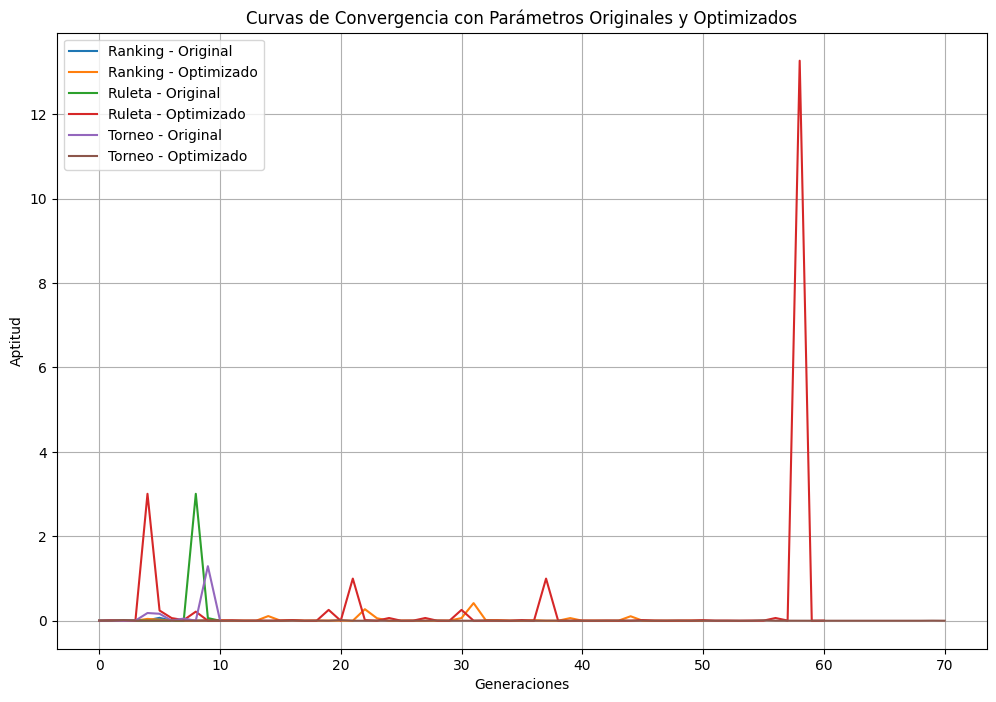

In [5]:

# Definir función para obtener las curvas de convergencia con historial de aptitudes
def curvas_convergencia(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones, metodo_seleccion):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_solucion = min(poblacion, key=aptitud)
    historial_aptitudes = [aptitud(mejor_solucion)]
    
    for generacion in range(generaciones):
        if metodo_seleccion == "ruleta":
            progenitores = seleccion_ruleta(poblacion)
        elif metodo_seleccion == "torneo":
            progenitores = seleccion_torneo(poblacion)
        elif metodo_seleccion == "ranking":
            progenitores = seleccion_ranking(poblacion)
        else:
            raise ValueError("Método de selección no válido.")
        
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])
        
        # Mutación
        descendientes_mutados = [mutacion(descendiente, tasa_mutacion) for descendiente in descendientes]
        
        # Actualizar población
        poblacion = descendientes_mutados
        
        # Evaluar el mejor individuo de la generación
        mejor_individuo = min(poblacion, key=aptitud)
        historial_aptitudes.append(aptitud(mejor_individuo))
    
    return historial_aptitudes

# Generar curvas de convergencia para los parámetros originales y optimizados
plt.figure(figsize=(12, 8))
for metodo in ['ranking', 'ruleta', 'torneo']:
    # Curva con parámetros originales
    aptitudes_original = curvas_convergencia(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES, metodo)
    plt.plot(aptitudes_original, label=f'{metodo.capitalize()} - Original')

    # Curva con parámetros optimizados
    params_optimos = optimos[metodo]
    aptitudes_optimizado = curvas_convergencia(params_optimos['tamanio_poblacion'], LONGITUD_CROMOSOMA, params_optimos['tasa_mutacion'], TASA_CRUCE, params_optimos['generaciones'], metodo)
    plt.plot(aptitudes_optimizado, label=f'{metodo.capitalize()} - Optimizado')

# Configuración de la gráfica
plt.xlabel('Generaciones')
plt.ylabel('Aptitud')
plt.title('Curvas de Convergencia con Parámetros Originales y Optimizados')
plt.legend()
plt.grid(True)
plt.show()



## f. Interpretación de los resultados

- **Ranking**: Los parámetros optimizados permiten una convergencia más rápida y un menor valor de aptitud final.
- **Ruleta**: La combinación optimizada reduce la variabilidad entre generaciones, mostrando una convergencia más estable.
- **Torneo**: El uso de una mayor población y generaciones permite alcanzar un mejor resultado con los parámetros optimizados.

En general, la optimización de los parámetros mejora notablemente el desempeño de los algoritmos.
